In [145]:
import tensorflow as tf
import numpy as np
import seaborn as sbrn
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
trainingPath = "./AgriculturaInteligente/trainingDB"
validPath = "./AgriculturaInteligente/validationDB"
testPath = "./AgriculturaInteligente/testDB"

In [52]:
# Aqui geramos batches de 10 imagens(no geral), com dois tipos de classes diferentes e um tamaho padrão 224x224
# As imagens serão salvas como valores RGB para cada pixel
testBatch = ImageDataGenerator().flow_from_directory(
        testPath, target_size = (224, 224), classes = ['sadias', 'contaminadas'], batch_size = 10)
validBatch = ImageDataGenerator().flow_from_directory(
        validPath, target_size = (224, 224), classes = ['sadias', 'contaminadas'], batch_size = 5)
trainingBatch = ImageDataGenerator().flow_from_directory(
        trainingPath, target_size = (224, 224), classes = ['sadias', 'contaminadas'], batch_size = 10)
print("As batches são do tipo Iterator: ",type(testBatch))

Found 50 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 130 images belonging to 2 classes.
As batches são do tipo Iterator:  <class 'keras_preprocessing.image.directory_iterator.DirectoryIterator'>


In [53]:
# next() opera sobre o iterador e nesse caso armazena os pixels da
# batch em `img` as classificações da batch em `labels`
img, labels = next(trainingBatch)

In [56]:
print("img:\n",img.shape, "\nNº na batch, linhas, colunas, Valor RGB\n")
print("labels:\n", labels.shape, "\nNº na batch, classe")

img:
 (10, 224, 224, 3) 
Nº na batch, linhas, colunas, Valor RGB

labels:
 (10, 2) 
Nº na batch, classe


In [126]:
labelStr = list(
    map(lambda x : 'sadia' if x == 1 else 'contaminada', labels[:,0]))
labelStr

['sadia',
 'sadia',
 'sadia',
 'contaminada',
 'contaminada',
 'sadia',
 'contaminada',
 'sadia',
 'contaminada',
 'contaminada']

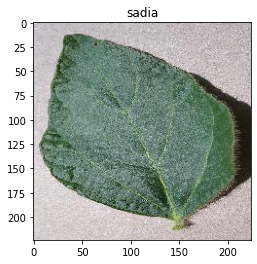

In [89]:
plt.imshow(img[0].astype(np.uint8))
plt.title("{}".format(labelStr[0]))
plt.show()

In [100]:
model = Sequential()
###### SEQUENTIAL.ADD() ADICIONA NOVAS CAMADAS À REDE #############

# Estamos criando uma rede neural convolucionária 
# que terá 32 neurônios de saída, que utilizará a função de ativação
# `relu` e fornecendo o formato do input.
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (224,224,3)) )
# Transformando a matriz 3D da entrada em um vetor.
model.add(Flatten())
# Agora nosso modelo terá dois outputs de saída. 

# softmax é uma função de ativação que dá a distribuição de probabilidade
# do conjunto de números do output. Cada output então, terá sua própria
# probabilidade
model.add(Dense(2, activation = 'softmax') )


In [101]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Vamos configurar a rede neural, optimizando os parâmetros através
# do algoritmo ADAM, e a função perda Categorical Crossentropy
model.compile(Adam(lr = 1E-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [217]:
# São 10 gerações de 12 treinos (acho que é assim) 
history = model.fit_generator(trainingBatch, steps_per_epoch = 12, 
                              validation_data = validBatch, validation_steps = 4,
                              epochs = 10, verbose = 2)

Epoch 1/10
12/12 - 3s - loss: 12.1503 - accuracy: 0.9417 - val_loss: 85.4850 - val_accuracy: 0.7500
Epoch 2/10
12/12 - 3s - loss: 18.2036 - accuracy: 0.9500 - val_loss: 53.2746 - val_accuracy: 0.8000
Epoch 3/10
12/12 - 3s - loss: 36.9561 - accuracy: 0.8917 - val_loss: 693.9835 - val_accuracy: 0.5500
Epoch 4/10
12/12 - 3s - loss: 68.4684 - accuracy: 0.8500 - val_loss: 113.7384 - val_accuracy: 0.8000
Epoch 5/10
12/12 - 3s - loss: 39.5980 - accuracy: 0.9000 - val_loss: 88.6039 - val_accuracy: 0.8000
Epoch 6/10
12/12 - 3s - loss: 42.5818 - accuracy: 0.9167 - val_loss: 63.3262 - val_accuracy: 0.8500
Epoch 7/10
12/12 - 3s - loss: 18.1196 - accuracy: 0.9500 - val_loss: 261.1706 - val_accuracy: 0.6500
Epoch 8/10
12/12 - 3s - loss: 2.4979 - accuracy: 0.9833 - val_loss: 113.8521 - val_accuracy: 0.6500
Epoch 9/10
12/12 - 3s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 63.7655 - val_accuracy: 0.7500
Epoch 10/10
12/12 - 3s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 242.8354 - val_accura

In [104]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


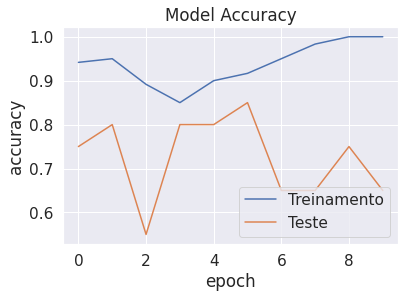

In [235]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) # Precisão da validação
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treinamento', 'Teste'], loc = 'lower right')
plt.show()

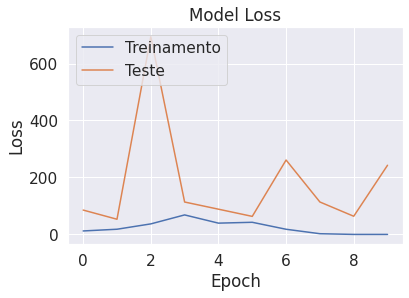

In [236]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # Precisão da validação
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Treinamento', 'Teste'], loc = 'upper left')
plt.show()

**Vamos agora testar a rede**

In [133]:
testImg, testLabels = next(testBatch)

In [134]:
print("img:\n",testImg.shape, "\nNº na batch, linhas, colunas, Valor RGB\n")
print("labels:\n", testLabels.shape, "\nNº na batch, classe")

img:
 (10, 224, 224, 3) 
Nº na batch, linhas, colunas, Valor RGB

labels:
 (10, 2) 
Nº na batch, classe


In [135]:
testLabels = testLabels[:,0]
testLabelStr = list(
    map(lambda x : 'sadia' if x == 1 else 'contaminada', testLabels) )
testLabelStr

['sadia',
 'contaminada',
 'sadia',
 'contaminada',
 'contaminada',
 'sadia',
 'contaminada',
 'contaminada',
 'sadia',
 'sadia']

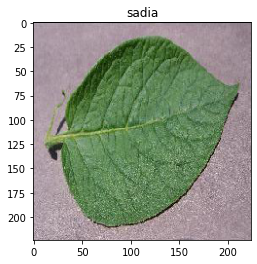

In [117]:
plt.imshow(testImg[0].astype(np.uint8))
plt.title("{}".format(testLabelStr[0]))
plt.show()

In [141]:
previsao = model.predict_generator(testBatch, steps = 1, verbose = 0)
print(previsao)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [153]:
confMatrix = confusion_matrix(testLabels, previsao[:,0])
print(confMatrix, '\n', type(confMatrix))

[[1 4]
 [2 3]] 
 <class 'numpy.ndarray'>


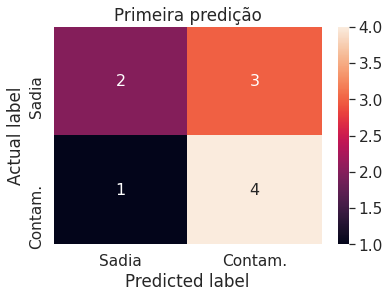

In [216]:
dfConfMatrix = pd.DataFrame(confMatrix, index = ('Sadia', 'Contam.'),
                  columns = ('Sadia', 'Contam.'))
sbrn.set(font_scale=1.4) # for label size
sbrn.heatmap(dfConfMatrix, annot=True, annot_kws={"size": 16}) # font size
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title("Primeira predição")
plt.show()

**Aprendendo a melhorar a previsão do modelo através do Transfer Learning**




In [156]:
# Vamos pegar uma rede já treinada e trabalhar em cima dela
vggModel = tf.keras.applications.vgg16.VGG16()
vggModel.summary()
# VGG 16 é uma rede neural gigante e super poderosa 
# que é capaz de identificar 1000 classes diferentes

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [157]:
type(vggModel)
# Como o tipo do modelo VGG16 é diferente do tipo Sequencial,
# iremos transformar um no outro

tensorflow.python.keras.engine.training.Model

In [160]:
newModel = Sequential()
for layer in vggModel.layers[:-1]:
  newModel.add(layer)
# Perceba que o novo modelo não possui a camada de output
newModel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [161]:
# Vamos impedir que as camadas recém adicionadas possam ser treinadas
# pois elas perderiam a eficácia
for layer in newModel.layers:
  layer.trainable = False
newModel.add(Dense(2, activation = 'softmax') )

In [166]:
pd.set_option('max_colwidth', -1)
layers = [(x, x.name ,x.trainable) for x in newModel.layers]
layersDf = pd.DataFrame(layers, columns = ['Tipo','Nome','Treinável'])
layersDf.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Tipo,Nome,Treinável
0,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe220365278>,block1_conv1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe220365550>,block1_conv2,False
2,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fe2203727f0>,block1_pool,False
3,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe220372668>,block2_conv1,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fe2203699b0>,block2_conv2,False


In [167]:
newModel.compile(Adam(lr = 1E-4), loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [218]:
newHistory = newModel.fit_generator(trainingBatch, steps_per_epoch = 12, 
                              validation_data = validBatch, validation_steps = 4,
                              epochs = 10, verbose = 2)

Epoch 1/10
12/12 - 45s - loss: 0.2569 - accuracy: 0.9333 - val_loss: 0.6744 - val_accuracy: 0.8000
Epoch 2/10
12/12 - 45s - loss: 0.2429 - accuracy: 0.9417 - val_loss: 0.5183 - val_accuracy: 0.9000
Epoch 3/10
12/12 - 48s - loss: 0.2239 - accuracy: 0.9583 - val_loss: 0.4727 - val_accuracy: 0.8500
Epoch 4/10
12/12 - 45s - loss: 0.2147 - accuracy: 0.9500 - val_loss: 0.5805 - val_accuracy: 0.8000
Epoch 5/10
12/12 - 44s - loss: 0.2032 - accuracy: 0.9500 - val_loss: 0.4237 - val_accuracy: 0.8500
Epoch 6/10
12/12 - 45s - loss: 0.1894 - accuracy: 0.9583 - val_loss: 0.3819 - val_accuracy: 0.9000
Epoch 7/10
12/12 - 44s - loss: 0.1767 - accuracy: 0.9667 - val_loss: 0.4985 - val_accuracy: 0.8000
Epoch 8/10
12/12 - 44s - loss: 0.1679 - accuracy: 0.9750 - val_loss: 0.4700 - val_accuracy: 0.8500
Epoch 9/10
12/12 - 44s - loss: 0.1544 - accuracy: 0.9750 - val_loss: 0.4193 - val_accuracy: 0.9000
Epoch 10/10
12/12 - 45s - loss: 0.1535 - accuracy: 0.9667 - val_loss: 0.3099 - val_accuracy: 0.9500


In [219]:
novaPrevisao = newModel.predict_generator(testBatch, steps = 1, verbose = 0)
print(novaPrevisao)

[[0.35360664 0.6463934 ]
 [0.3165175  0.6834825 ]
 [0.7457888  0.25421122]
 [0.7149685  0.28503153]
 [0.07246037 0.9275396 ]
 [0.00372244 0.9962775 ]
 [0.8980025  0.1019975 ]
 [0.92950976 0.07049027]
 [0.01894997 0.9810501 ]
 [0.9964294  0.0035706 ]]


In [220]:
nconfmat = confusion_matrix(testLabels, np.round(novaPrevisao[:,0]))
print(nconfmat, type(nconfmat))

[[3 2]
 [2 3]] <class 'numpy.ndarray'>


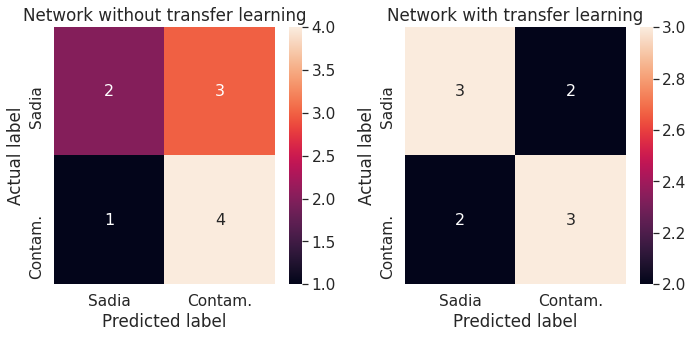

In [221]:
def pltConf():
  dfNCM = pd.DataFrame(nconfmat, index = ('Sadia', 'Contam.'),
                  columns = ('Sadia', 'Contam.'))
  
  dfConfMatrix = pd.DataFrame(confMatrix, index = ('Sadia', 'Contam.'),
                  columns = ('Sadia', 'Contam.'))

  plt.figure(figsize=(10,5))
  
  plt.subplot(1, 2, 1)

  sbrn.set(font_scale=1.4) # for label size
  sbrn.heatmap(dfConfMatrix, annot=True, annot_kws={"size": 16}) # font size
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title('Network without transfer learning')

  plt.subplot(1,2, 2)

  sbrn.set(font_scale=1.4) # for label size
  sbrn.heatmap(dfNCM, annot=True, annot_kws={"size": 16}) # font size
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.title("Network with transfer learning")


  plt.tight_layout()
  plt.show()

pltConf()

In [231]:
testImg, testLabels = next(testBatch)
testLabels = testLabels[:,0]
previsao = model.predict_generator(testBatch, steps = 1, verbose = 0)
novaPrevisao = newModel.predict_generator(testBatch, steps = 1, verbose = 0)

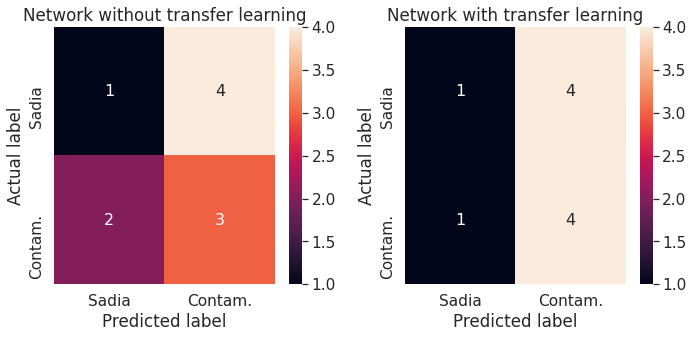

In [232]:
confMatrix = confusion_matrix(testLabels, np.round(previsao[:,0]))
nconfmat = confusion_matrix(testLabels, np.round(novaPrevisao[:,0]))

pltConf()

In [233]:
def analyse():
  
  plt.figure(figsize = (12,5))
  
  plt.subplot(1,2,1)
  
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy']) # Precisão da validação
  plt.title('Original Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Treinamento', 'Teste'], loc = 'lower right')

  plt.subplot(1,2,2)

  plt.plot(newHistory.history['accuracy'])
  plt.plot(newHistory.history['val_accuracy']) # Precisão da validação
  plt.title('Transfer Learning Model Accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['Treinamento', 'Teste'], loc = 'lower right')

  plt.show()

  plt.figure(figsize = (12,5))
  
  plt.subplot(1,2,1)
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss']) # Precisão da validação
  plt.title('Original Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Treinamento', 'Teste'], loc = 'upper left')

  plt.subplot(1,2,2)

  plt.plot(newHistory.history['loss'])
  plt.plot(newHistory.history['val_loss']) # Precisão da validação
  plt.title('Transfer Learning Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Treinamento', 'Teste'], loc = 'upper left')
  
  plt.show()


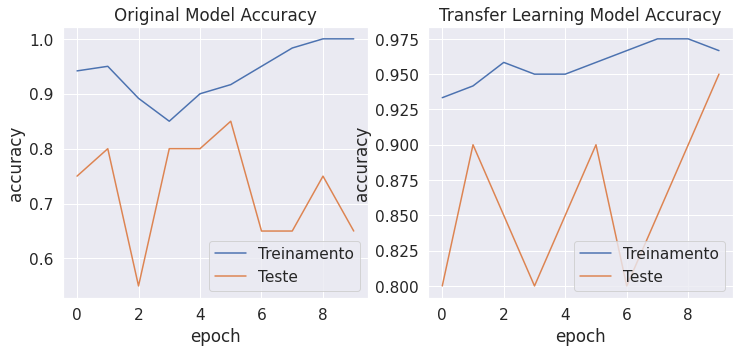

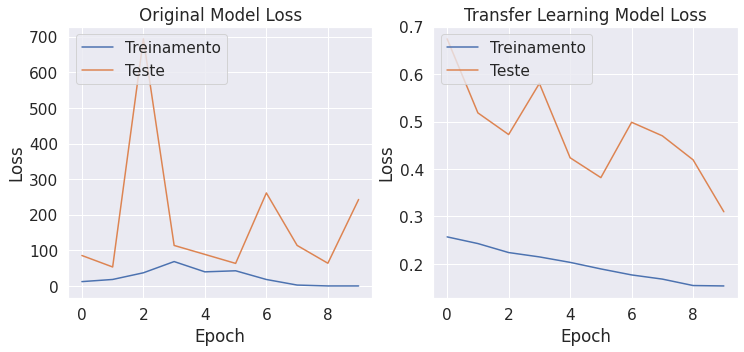

In [234]:
analyse()